In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# better plots
sns.set(rc={'figure.figsize':(12,8)});

In [4]:
directory = os.path.dirname(os.getcwd())
directory

'd:\\github\\AssignmentEconometricsIV'

## Question

The first question consists of a factor analysis of a large dataset. We consider monthly close-to-
close excess returns from a cross-section of 9,456 firms traded in the New York Stock Exchange.
The data starts on November 1991 and runs until December 2018. There are 326 monthly
observations in total. 

In addition to the returns we also consider 16 monthly factors: 

- Market (MKT)
- Small-minus-Big (SMB)
- High-minus-Low (HML)
- Conservative-minus-Aggressive (CMA)
- Robust-minus-Weak (RMW)
- earning/price ratio (EP)
- cash-flow/price ratio (CFP)
- dividend/price ratio
- accruals (ACC)
- market beta (BETA)
- net share issues 
- daily variance (RETVOL)
- daily idiosyncratic variance (IDIOVOL)
- 1-month momentum (MOM1)
- 36-month momentum (MOM36)

The dataset is organized as an excel file named `returns.xlsx`.

In [5]:
input_path = f'{directory}\\data\\returns.xlsx'
df = pd.read_excel(input_path, index_col=0)

In [6]:
df.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
factors_name = df.columns[:16]
factors_name

Index(['MKT', 'HML', 'SMB', 'MOM1', 'MOM36', 'ACC', 'BETA', 'CFP', 'CHCSHO',
       'DY', 'EP', 'IDIOVOL', 'CMA', 'UMD', 'RMW', 'RETVOL'],
      dtype='object')

In [8]:
factors = df[factors_name]
factors.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,EP,IDIOVOL,CMA,UMD,RMW,RETVOL
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,0.001586,0.036246,-0.014193,0.012468,-0.005361,0.026900
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,-0.008621,-0.042074,-0.003394,0.079571,0.032935,-0.029811
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,-0.006754,-0.089817,0.019346,-0.026594,0.005965,-0.076449
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,0.016494,-0.012679,0.022658,-0.005968,0.017131,-0.021424
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,0.032956,0.060565,0.025606,-0.003624,-0.013689,0.027512


In [9]:
returns_name = df.columns[16:]
returns_name

Index(['r_   1', 'r_   2', 'r_   3', 'r_   4', 'r_   5', 'r_   6', 'r_   7',
       'r_   8', 'r_   9', 'r_  10',
       ...
       'r_9447', 'r_9448', 'r_9449', 'r_9450', 'r_9451', 'r_9452', 'r_9453',
       'r_9454', 'r_9455', 'r_9456'],
      dtype='object', length=9456)

In [10]:
returns = df[returns_name]
returns.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,0.130715,-0.053900,-0.110696,-0.043900,0.218322,0.050645,0.575047,0.008921,-0.105349,-0.034203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,-0.010580,-0.056432,0.213591,0.183700,1.299230,0.306545,0.040644,-0.003800,0.318781,0.178492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.055124,-0.003400,-0.164114,-0.205154,-0.082347,0.075547,-0.024677,-0.066691,0.155137,0.071490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,-0.202800,5.219422,0.039753,-0.057745,-0.117086,0.204517,-0.089757,-0.083881,0.018253,0.128348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,0.078418,-0.181971,-0.023808,0.043112,0.415955,0.064782,-0.146257,-0.179871,-0.209586,-0.173690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
daterange = returns.index
daterange

DatetimeIndex(['1991-11-29', '1991-12-31', '1992-01-31', '1992-02-28',
               '1992-03-31', '1992-04-30', '1992-05-29', '1992-06-30',
               '1992-07-31', '1992-08-31',
               ...
               '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='dates', length=326, freq=None)

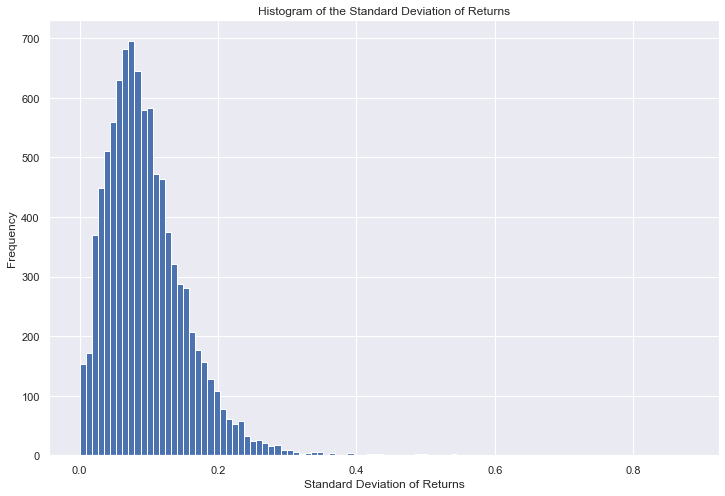

In [12]:
plt.hist(returns.std(axis=0), bins=100)
plt.xlabel('Standard Deviation of Returns')
plt.ylabel('Frequency')
plt.title('Histogram of the Standard Deviation of Returns');

In [13]:
X = (returns - returns.mean(axis=0))/returns.std(axis=0)
X.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,1.483764,-0.219996,-0.914187,-0.665776,1.031984,0.207163,3.474317,-0.028135,-0.775232,-0.357849,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1991-12-31,-0.223389,-0.226904,1.435410,2.066812,6.526489,1.869218,0.235135,-0.125593,2.076082,1.415134,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-01-31,-0.761584,-0.082197,-1.301224,-2.601812,-0.496389,0.368900,-0.160796,-0.607431,0.975946,0.523187,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-02-28,-2.545832,14.169328,0.175881,-0.832001,-0.672972,1.206552,-0.555266,-0.739131,0.055711,0.997142,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-03-31,0.851900,-0.569465,-0.284648,0.378895,2.036596,0.298978,-0.897734,-1.474551,-1.475986,-1.520584,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962


In [14]:
sum(round(X.mean(axis=0), 10) == 0)

9456

In [15]:
sum(round(X.std(axis=0), 10) == 1)

9456

### (a) (30 points) 

Compute the principal components of the returns and determine the optimal number of principal factors by one the methods described in Lecture 2. How much of the variance will the factors be able to explain?

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [17]:
Z = pca.fit_transform(X)
gamma = pca.components_
lambdas = pca.explained_variance_
alphas = pca.explained_variance_ratio_
cumulated_alphas = pca.explained_variance_ratio_.cumsum()

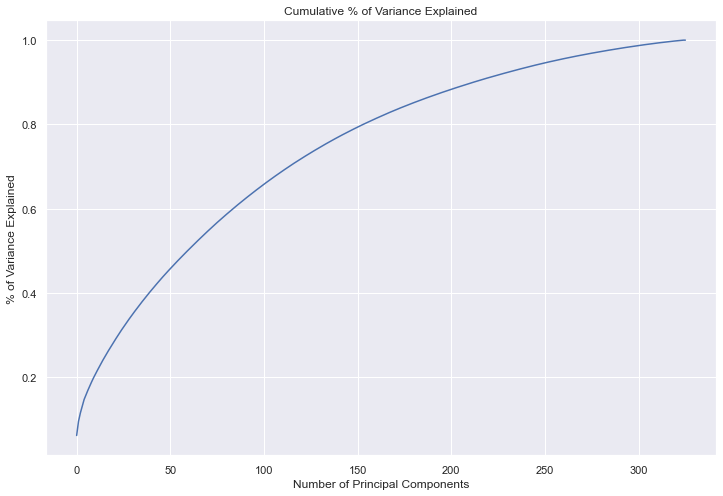

In [18]:
plt.plot(cumulated_alphas)
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Variance Explained')
plt.title('Cumulative % of Variance Explained');

In [19]:
len(Z)

326

In [20]:
name_cols = []
for i in range(len(Z)):
    name_col = f'PC {i+1}'
    name_cols.append(name_col)

In [21]:
components = pd.DataFrame(Z, index=daterange, columns=name_cols)
components.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 317,PC 318,PC 319,PC 320,PC 321,PC 322,PC 323,PC 324,PC 325,PC 326
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,11.533373,2.117902,7.135382,-2.573324,0.418788,0.085067,-2.505428,-0.983358,1.059950,1.302930,...,-0.276493,-0.030583,0.376828,0.028419,0.223843,0.135267,-0.128892,0.068279,-0.194675,4.442946e-15
1991-12-31,-13.686073,-4.860525,-12.415259,5.514070,-4.081183,-1.011910,4.643956,0.513753,1.382309,1.332409,...,-0.252766,0.053583,-0.084363,0.361802,-0.057501,0.119258,-0.341420,0.227893,0.239768,4.442946e-15
1992-01-31,-13.108576,6.045242,-7.425216,3.134872,3.861093,-5.531348,-1.698935,0.356089,-0.445595,-1.875859,...,-0.180783,-0.079209,-0.037675,-0.018815,-0.161823,0.074299,-0.137390,0.187490,0.068724,4.442946e-15
1992-02-28,-3.926188,1.370226,-2.742426,2.566578,1.095583,-3.776330,-1.430028,-0.642822,-0.863886,0.164132,...,-0.004539,0.263540,-0.167437,0.073019,-0.329672,0.382605,-0.193439,0.037832,0.234330,4.442946e-15
1992-03-31,6.756658,0.843371,4.095032,1.095002,0.037724,-0.869329,-1.048341,-0.354532,0.547573,1.097951,...,0.027332,-0.048225,0.200638,-0.694656,-0.109127,0.178205,-0.220113,-0.074723,0.074600,4.442946e-15


In [22]:
def covariance_matrix(df1, df2):
    # covariance matrix dataframe
    cov_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)

    # filling the covariance matrix dataframe
    for df1_pca in df1.columns:
        for df2_pca in df2.columns:
            cov_matrix[df2_pca][df1_pca] = df1[df1_pca].cov(df2[df2_pca])
    return(cov_matrix)

In [23]:
Lambda = covariance_matrix(components, components)

In [24]:
Lambda.head(10)[['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,581.031536,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
PC 2,0.0,317.615798,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
PC 3,0.0,0.0,188.950028,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
PC 4,0.0,0.0,-0.0,154.30857,-0.0,0.0,0.0,0.0,-0.0,-0.0
PC 5,-0.0,0.0,-0.0,-0.0,147.835291,-0.0,0.0,-0.0,0.0,0.0
PC 6,0.0,-0.0,-0.0,0.0,-0.0,103.523495,-0.0,-0.0,-0.0,0.0
PC 7,-0.0,0.0,-0.0,0.0,0.0,-0.0,101.946593,-0.0,-0.0,-0.0
PC 8,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,95.698654,-0.0,-0.0
PC 9,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,93.638017,0.0
PC 10,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,89.441144


In [25]:
lambdas[:10]

array([581.03153639, 317.61579777, 188.95002829, 154.30856979,
       147.83529081, 103.52349548, 101.94659277,  95.69865357,
        93.63801701,  89.4411444 ])

In [26]:
# rule of thumb
rule_rt = alphas >= 0.03
n_pca_rt = sum(rule_rt)
n_pca_rt

2

In [27]:
variance_explained = round(cumulated_alphas[n_pca_rt - 1]*100, 2)
print(f'The first {n_pca_rt} explain {variance_explained}% of the returns variance.')

The first 2 explain 9.5% of the returns variance.


In [28]:
# informal way
rule_iw = cumulated_alphas < 0.9
n_pca_iw = sum(rule_iw)
n_pca_iw

212

In [29]:
variance_explained = round(cumulated_alphas[n_pca_iw - 1]*100, 2)
print(f'The first {n_pca_iw} explain {variance_explained}% of the returns variance.')

The first 212 explain 89.89% of the returns variance.


In [30]:
# biggest drop
r_vector = []
for i in range(len(lambdas)-1):
    r_i = lambdas[i]/lambdas[i+1]
    r_vector.append(r_i)

In [31]:
r_vector_ = r_vector[:-1]

In [32]:
max_value = max(r_vector_)
n_pca_bd = np.argmax(r_vector_) + 1
n_pca_bd

1

In [33]:
variance_explained = round(cumulated_alphas[n_pca_bd - 1]*100, 2)
print(f'The first {n_pca_bd} explain {variance_explained}% of the returns variance.')

The first 1 explain 6.14% of the returns variance.


### (b) (30 points)
Regress the selected factors on the 16 observed "anomaly" factors described above. How do the "principal component factors" relate to the "anomaly factors"?

In [34]:
# rule of thumb
pca_rt = components.iloc[:,:n_pca_rt]
pca_rt.head()

,PC 1,PC 2
dates,,
1991-11-29,11.533373,2.117902
1991-12-31,-13.686073,-4.860525
1992-01-31,-13.108576,6.045242
1992-02-28,-3.926188,1.370226
1992-03-31,6.756658,0.843371


In [35]:
# informal way
pca_iw = components.iloc[:,:n_pca_iw]
pca_iw.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 203,PC 204,PC 205,PC 206,PC 207,PC 208,PC 209,PC 210,PC 211,PC 212
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,11.533373,2.117902,7.135382,-2.573324,0.418788,0.085067,-2.505428,-0.983358,1.059950,1.302930,...,-3.872306,1.095551,2.607965,-4.030602,-2.474042,-2.404104,2.402297,-1.157347,7.645667,3.278153
1991-12-31,-13.686073,-4.860525,-12.415259,5.514070,-4.081183,-1.011910,4.643956,0.513753,1.382309,1.332409,...,-3.499568,1.671635,-0.023528,-2.507384,1.496394,-0.655313,-0.990915,-1.453298,3.727237,-4.902627
1992-01-31,-13.108576,6.045242,-7.425216,3.134872,3.861093,-5.531348,-1.698935,0.356089,-0.445595,-1.875859,...,0.722921,-0.797766,0.528952,-0.902925,2.890381,-0.439773,-0.750824,-2.462226,-1.300075,-1.400441
1992-02-28,-3.926188,1.370226,-2.742426,2.566578,1.095583,-3.776330,-1.430028,-0.642822,-0.863886,0.164132,...,-0.646163,2.668437,3.579871,4.005064,-5.937680,0.644164,1.984537,3.568161,-1.265035,-4.204775
1992-03-31,6.756658,0.843371,4.095032,1.095002,0.037724,-0.869329,-1.048341,-0.354532,0.547573,1.097951,...,-3.306894,-5.866820,-6.999615,-2.616894,-4.410043,-4.098874,-13.006208,4.494335,20.374298,-0.929347


In [36]:
# biggest drop
pca_bd = components.iloc[:,:n_pca_bd]
pca_bd.head()

,PC 1
dates,
1991-11-29,11.533373
1991-12-31,-13.686073
1992-01-31,-13.108576
1992-02-28,-3.926188
1992-03-31,6.756658


In [37]:
factors

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,EP,IDIOVOL,CMA,UMD,RMW,RETVOL
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,0.001586,0.036246,-0.014193,0.012468,-0.005361,0.026900
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,-0.008621,-0.042074,-0.003394,0.079571,0.032935,-0.029811
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,-0.006754,-0.089817,0.019346,-0.026594,0.005965,-0.076449
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,0.016494,-0.012679,0.022658,-0.005968,0.017131,-0.021424
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,0.032956,0.060565,0.025606,-0.003624,-0.013689,0.027512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.034764,-0.043678,0.013731,0.014853,-0.004026,0.023248,-0.000109,-0.033087,-0.020732,-0.019059,-0.028656,-0.038641,-0.017518,0.048977,0.037510,-0.015509
2018-09-28,-0.000367,-0.022018,-0.020170,0.002387,0.007886,0.009029,0.023354,0.002636,0.011141,-0.050703,-0.010365,0.012190,-0.002196,0.001102,-0.001261,0.004711
2018-10-31,-0.076184,0.033774,-0.042549,0.011678,0.010789,-0.033961,0.087205,0.039718,0.047718,0.026241,0.052475,0.073898,0.031974,-0.020262,-0.018420,0.060142


In [38]:
y = factors['MKT']
y

dates
1991-11-29   -0.041264
1991-12-31    0.107984
1992-01-31   -0.007668
1992-02-28    0.010796
1992-03-31   -0.025367
                ...   
2018-08-31    0.034764
2018-09-28   -0.000367
2018-10-31   -0.076184
2018-11-30    0.016938
2018-12-31   -0.096711
Name: MKT, Length: 326, dtype: float64

In [39]:
X = pca_rt
X

,PC 1,PC 2
dates,,
1991-11-29,11.533373,2.117902
1991-12-31,-13.686073,-4.860525
1992-01-31,-13.108576,6.045242
1992-02-28,-3.926188,1.370226
1992-03-31,6.756658,0.843371
...,...,...
2018-08-31,-2.126480,-1.596653
2018-09-28,9.781772,3.594731
2018-10-31,32.165374,17.819783


In [40]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

LinearRegression()

In [41]:
reg.coef_

array([-0.00150399, -0.0002519 ])

In [42]:
from sklearn.metrics import r2_score

pred = reg.predict(X)
r2 = round(r2_score(y, pred)*100, 2)
print(f'R^2: {r2}')

R^2: 76.97


In [50]:
from sklearn.metrics import mean_squared_error

# rmse function
rmse_score = lambda act, pred: np.sqrt(mean_squared_error(act, pred))

rmse_ = round(rmse_score(y, pred), 2)
print(f'RMSE: {rmse_}')

RMSE: 0.0199516702


In [45]:
from functions.metrics2 import r_squared, rmse

In [46]:
r_squared(y, pred)

0.7696911377282314

In [47]:
rmse(y, pred)

0.019951670230464874

In [53]:
import nbimporter
from functions.metrics import r_squared, rmse

In [54]:
r_squared(y, pred)

0.7696911377282314

In [55]:
rmse(y, pred)

0.019951670230464874